# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 1) Load & split the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [10]:
print(X_train.shape)
print(y_train.shape)

print(X_train[0].shape)
print(y_train[0].shape)

print(y_test[0])

(55000, 28, 28)
(55000,)
(28, 28)
()
9


In [ ]:
# 2) Normalize pixels to [0,1]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

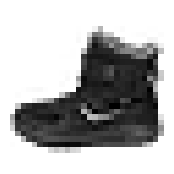

In [12]:
plt.figure(figsize=(2, 2))  # Smaller size
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# 3) Sequential‑API model definition
model = models.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(300, activation="relu"),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# tf.keras.utils.plot_model(model, "D:/AIML/data/my_fashion_mnist_model.png", show_shapes=True)

In [16]:
"""model.layers
hidden1 = model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1
weights, biases = hidden1.get_weights()
weights
weights.shape """

"model.layers\nhidden1 = model.layers[1]\nhidden1.name\nmodel.get_layer('dense') is hidden1\nweights, biases = hidden1.get_weights()\nweights\nweights.shape "

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# extra code – this cell is equivalent to the previous cell
# model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [18]:
# extra code – shows how to convert class ids to one-hot vectors
convert_labels_to_onehot = tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

# extra code – shows how to convert one-hot vectors to class ids
convert_onehot_to_labels = np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1
)


print(convert_labels_to_onehot)
print(convert_onehot_to_labels)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[0 5 1 0]


In [19]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7189 - accuracy: 0.7646 - val_loss: 0.5138 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4848 - accuracy: 0.8320 - val_loss: 0.4501 - val_accuracy: 0.8388
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4405 - accuracy: 0.8472 - val_loss: 0.4196 - val_accuracy: 0.8524
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4120 - accuracy: 0.8563 - val_loss: 0.3988 - val_accuracy: 0.8584
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3926 - accuracy: 0.8627 - val_loss: 0.4188 - val_accuracy: 0.8534
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3777 - accuracy: 0.8678 - val_loss: 0.3877 - val_accuracy: 0.8600
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3621 - accuracy: 0.8720 - val_loss: 0.3902 - val_accuracy:

In [20]:

# 6) Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")


313/313 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8876

Test Accuracy: 0.8876


In [ ]:

# 7) Predict on new samples
X_new = X_test[:5]
y_pred_probs = model.predict(X_new)
print(y_pred_probs.round(2))
y_pred = np.argmax(y_pred_probs, axis=1)

for i, (pred, true) in enumerate(zip(y_pred, y_test[:5])):
    print(f"Sample {i}: Predicted={pred}, True={true}")

1/1 [==============================] - 0s 88ms/step
[[0.   0.   0.   0.   0.   0.02 0.   0.02 0.   0.96]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.   0.01 0.   0.   0.   0.88 0.   0.   0.  ]]
Sample 0: Predicted=9, True=9
Sample 1: Predicted=2, True=2
Sample 2: Predicted=1, True=1
Sample 3: Predicted=1, True=1
Sample 4: Predicted=6, True=6


In [23]:
y_pred = y_pred_probs.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [24]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [26]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)